In [8]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# ✅ Step 1: Upload & Load Data
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.lower()

# ✅ Step 2: Data Preprocessing
features = ["suitable_for_profile", "preferences", "gift_description", "gift_category", "country"]
target = "gift_name"

df.fillna({"preferences": df["preferences"].mode()[0]}, inplace=True)
df[target] = df[target].astype(str)

# Convert text features into a single combined string
df["text_data"] = df[features].apply(lambda x: " ".join(x.astype(str)), axis=1)

# Tokenization & Padding
max_words = 5000  # Vocabulary Size
max_len = 100     # Maximum Text Length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text_data"])
X = tokenizer.texts_to_sequences(df["text_data"])
X = pad_sequences(X, maxlen=max_len, padding="post")

# Encode Target Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[target])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 3: CNN Model for Gift Recommendation
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# ✅ Set Learning Rate
learning_rate = 0.005  # Adjust as needed
optimizer = Adam(learning_rate=learning_rate)

# ✅ Compile the Model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Adaptive Learning Rate Reduction
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# ✅ Step 4: Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

# ✅ Step 5: Evaluate & Predict
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# ✅ Example Prediction
example_text = df["text_data"].iloc[3]
example_sequence = tokenizer.texts_to_sequences([example_text])
example_padded = pad_sequences(example_sequence, maxlen=max_len, padding="post")

predicted_label = label_encoder.inverse_transform([np.argmax(model.predict(example_padded))])[0]

print("\n🎁 Gift Recommendation Report:")
print(f"🏆 Best Model: CNN with Accuracy {accuracy:.2%}")
print(f"🎁 Recommended Gift: {predicted_label}")

Saving UPHAAR_dataset_cleanedReport (1).csv to UPHAAR_dataset_cleanedReport (1) (7).csv
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.0729 - loss: 2.7074 - val_accuracy: 0.0333 - val_loss: 2.6040 - learning_rate: 0.0050
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1317 - loss: 2.5436 - val_accuracy: 0.3000 - val_loss: 2.1906 - learning_rate: 0.0050
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3023 - loss: 2.1454 - val_accuracy: 0.5000 - val_loss: 1.6171 - learning_rate: 0.0050
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5367 - loss: 1.6141 - val_accuracy: 0.5333 - val_loss: 1.2806 - learning_rate: 0.0050
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6479 - loss: 1.0296 - val_accuracy: 0.6667 - val_loss: 0.9391 - learning_rate: 0.0050
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6394 - loss: 0.9607 - val_accuracy: 0.8000 - val_loss: 0.6776 - learning_rate: 0.0050
Epoch 7/20
4/4 ━━

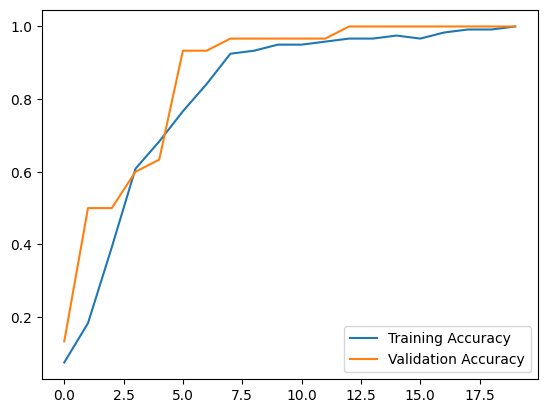

In [ ]:
# Training Accuracy vs. Validation Accuracy:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

**Confusion_matrix**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


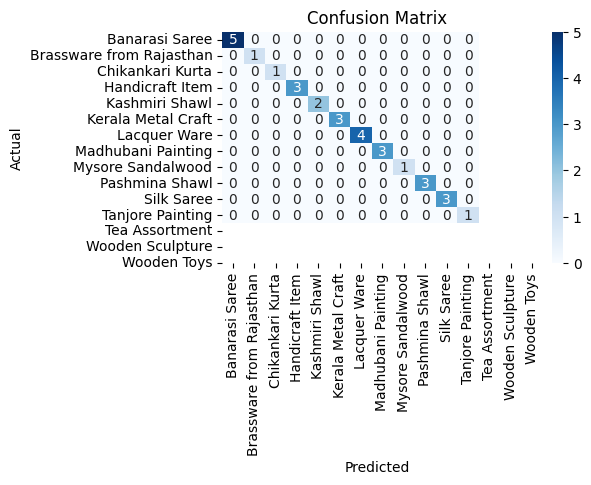

Classification Report:
                          precision    recall  f1-score   support

          Banarasi Saree       1.00      1.00      1.00         5
Brassware from Rajasthan       1.00      1.00      1.00         1
        Chikankari Kurta       1.00      1.00      1.00         1
          Kashmiri Shawl       1.00      1.00      1.00         3
      Kerala Metal Craft       1.00      1.00      1.00         2
      Madhubani Painting       1.00      1.00      1.00         3
       Mysore Sandalwood       1.00      1.00      1.00         4
          Pashmina Shawl       1.00      1.00      1.00         3
              Silk Saree       1.00      1.00      1.00         1
        Tanjore Painting       1.00      1.00      1.00         3
        Wooden Sculpture       1.00      1.00      1.00         3
             Wooden Toys       1.00      1.00      1.00         1

                accuracy                           1.00        30
               macro avg       1.00      1.00      

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
# Get the unique classes present in y_test
unique_labels = np.unique(y_test)
# Get the corresponding target names using the label encoder
target_names = label_encoder.inverse_transform(unique_labels)
print(classification_report(y_test, y_pred_classes, target_names=target_names, labels = unique_labels))

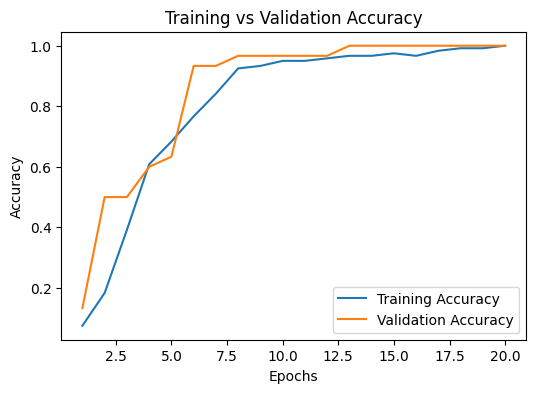

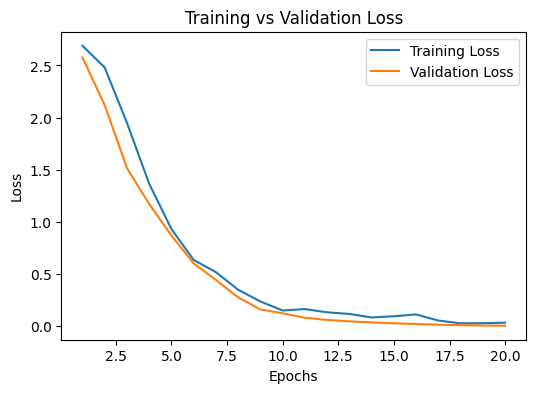

In [ ]:
import matplotlib.pyplot as plt

# Extract values from training history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# ✅ Plot Accuracy Curve
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# ✅ Plot Loss Curve
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
